In this notebook, I will be talking about different scoring and evaluation metrics used in ML as well as grid search optimization for better hyperparameters selection

datasets from oil and gas industry  will be used to detect sand production wells as well as facies classification

# binary classification: sand production

*sand production which is considered to
be 1 if sand production occurred and 0 if sand was not produced from a well*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving Chapter7_Sand Production.csv to Chapter7_Sand Production.csv


{'Chapter7_Sand Production.csv': b'No,TVD,TT,COH,Qg,Qw,BHFP,DD,EOVS,SPF,Hperf,Sand Production Observed\r\n1,319,105,22,42.3,5672,133.2,27.8,651,4,14,1\r\n2,3182,105,21.9,51.2,68,140.4,16.6,642,4,16,1\r\n3,3366,100,24.7,66.9,157,156.2,18.9,601,4,6,1\r\n4,3647,100,29.6,80.6,85,153.8,57.8,670,8,20,1\r\n5,4548,85,53.2,48,886,209.1,58.9,823,4,18,1\r\n6,4088,85,39.5,72.7,116,147,44,781,2,17,1\r\n7,2100,115,10.8,28.5,724,160.1,8.9,300,4,15.5,1\r\n8,1930,132,9.7,27.5,695,175.5,11.2,245,4,11.5,1\r\n9,2139,112,11.1,36.8,280,185.5,6.1,283,4,10.5,1\r\n10,2380,110,13,23,42,113,47.4,413,6,11,1\r\n11,1122,150,5.7,108,0,107,8,115,12,10.5,1\r\n12,1340,130,6.6,51,52,126.6,14.4,140,12,6.5,1\r\n13,1070,170,5.5,82,70,103.8,0.7,111,4,9,1\r\n14,1920,130,9.6,111,0,248,82,153,4,9,1\r\n15,2530,100,14.3,58,68,302.2,97.8,242,4,4.5,1\r\n16,1640,145,8,94,1260,189,46.8,150,12,10,1\r\n17,2130,120,11,86,112,268.3,31.7,179,4,3.5,1\r\n18,3655,100,19.8,69.8,1780,287.6,9.1,553,4,21,1\r\n19,3668,100,30,75.8,150,272.3,9.2,5

In [22]:
df=pd.read_csv('Chapter7_Sand Production.csv')
df.head()

,No,TVD,TT,COH,Qg,Qw,BHFP,DD,EOVS,SPF,Hperf,Sand Production Observed
0,1,319,105,22.0,42.3,5672.0,133.2,27.8,651,4.0,14.0,1
1,2,3182,105,21.9,51.2,68.0,140.4,16.6,642,4.0,16.0,1
2,3,3366,100,24.7,66.9,157.0,156.2,18.9,601,4.0,6.0,1
3,4,3647,100,29.6,80.6,85.0,153.8,57.8,670,8.0,20.0,1
4,5,4548,85,53.2,48.0,886.0,209.1,58.9,823,4.0,18.0,1


In [23]:
df[df['Sand Production Observed']==1]
#so 21 wells are producing sand out of 29
#which means 72% producing sand and 28% not

,No,TVD,TT,COH,Qg,Qw,BHFP,DD,EOVS,SPF,Hperf,Sand Production Observed
0,1,319,105,22.0,42.3,5672.0,133.2,27.8,651,4.0,14.0,1
1,2,3182,105,21.9,51.2,68.0,140.4,16.6,642,4.0,16.0,1
2,3,3366,100,24.7,66.9,157.0,156.2,18.9,601,4.0,6.0,1
3,4,3647,100,29.6,80.6,85.0,153.8,57.8,670,8.0,20.0,1
4,5,4548,85,53.2,48.0,886.0,209.1,58.9,823,4.0,18.0,1
5,6,4088,85,39.5,72.7,116.0,147.0,44.0,781,2.0,17.0,1
6,7,2100,115,10.8,28.5,724.0,160.1,8.9,300,4.0,15.5,1
7,8,1930,132,9.7,27.5,695.0,175.5,11.2,245,4.0,11.5,1
8,9,2139,112,11.1,36.8,280.0,185.5,6.1,283,4.0,10.5,1
9,10,2380,110,13.0,23.0,42.0,113.0,47.4,413,6.0,11.0,1


In [24]:
#exclude the column No reffering to number of wells since it isn't important 
x=df.iloc[:, 1:11]
y=df.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3, leaf_size=3)
knc.fit(x_train, y_train)
y_train_predict=knc.predict(x_train)
y_test_predict=knc.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_predict))

0.7777777777777778


In [8]:
#we can use for binary classification also: 
#f1_score, precision_score, recall_score
#use also the classification report 

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



# Multiclass classification: facies classification

Confusion matrix is the widely used technique in multi class classification

In [10]:
from google.colab import files
files.upload()

Saving Chapter7_Facies Data.csv to Chapter7_Facies Data.csv


{'Chapter7_Facies Data.csv': b'Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS\r\n3,A1 SH,SHRIMPLIN,2793,77.45,0.664,9.9,11.915,4.6,1,1\r\n3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979\r\n3,A1 SH,SHRIMPLIN,2794,79.05,0.658,14.8,13.05,3.6,1,0.957\r\n3,A1 SH,SHRIMPLIN,2794.5,86.1,0.655,13.9,13.115,3.5,1,0.936\r\n3,A1 SH,SHRIMPLIN,2795,74.58,0.647,13.5,13.3,3.4,1,0.915\r\n3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14,13.385,3.6,1,0.894\r\n3,A1 SH,SHRIMPLIN,2796,73.72,0.63,15.6,13.93,3.7,1,0.872\r\n3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.92,3.5,1,0.83\r\n3,A1 SH,SHRIMPLIN,2797,73.79,0.624,16.2,13.98,3.4,1,0.809\r\n3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.22,3.5,1,0.787\r\n3,A1 SH,SHRIMPLIN,2798,76.11,0.6,14.8,13.375,3.6,1,0.766\r\n3,A1 SH,SHRIMPLIN,2798.5,74.95,0.583,13.3,12.69,3.7,1,0.745\r\n3,A1 SH,SHRIMPLIN,2799,71.87,0.561,11.3,12.475,3.5,1,0.723\r\n3,A1 SH,SHRIMPLIN,2799.5,83.42,0.537,13.3,14.93,3.4,1,0.702\r\n2,A1 SH,SHRIMPLIN,2800,90.1,0

In [37]:
df=pd.read_csv('Chapter7_Facies Data.csv')
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [38]:
x=df.iloc[:, 4:11]

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
y=df.iloc[:,0]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=50)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [14]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           1       0.88      0.40      0.55        70
           2       0.54      0.89      0.68       171
           3       0.79      0.44      0.57       156
           4       0.38      0.35      0.36        40
           5       0.00      0.00      0.00        56
           6       0.48      0.69      0.57       117
           7       0.78      0.27      0.40        26
           8       0.44      0.70      0.54       116
           9       1.00      0.14      0.25        56

    accuracy                           0.54       808
   macro avg       0.59      0.43      0.43       808
weighted avg       0.59      0.54      0.51       808



In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[ 28  42   0   0   0   0   0   0   0]
 [  1 152  17   0   0   0   1   0   0]
 [  1  78  69   2   3   2   0   1   0]
 [  1   1   0  14   0  20   1   3   0]
 [  1   2   0   6   0  31   0  16   0]
 [  0   1   1   3   1  81   0  30   0]
 [  0   0   0   7   0   0   7  12   0]
 [  0   3   0   2   0  30   0  81   0]
 [  0   0   0   3   0   5   0  40   8]]


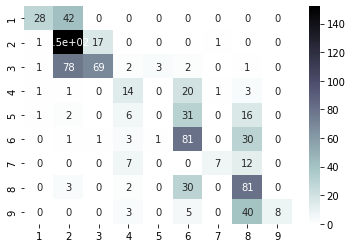

In [16]:

cm=pd.DataFrame(confusion_matrix(y_test, y_test_predict),index=range(1,10), columns=range(1,10))

sns.heatmap(cm, annot=True, cmap='bone_r')
#non-zero values in the diagonal  ----> GOOD MODEL
#so here its a good model

For regression applications, use r2, MAE, MSE..

# Cross Validation score

*used in my previous files uploaded*

In [17]:
#i was using k-folds
#in the k-folds, each fold train the data and the rest for testing
#to include the % of our results, stratified k-fold comes

#lets say in our example 72% are sand wells producers and 28% are not

#so in stratified k folds, each fold will have 72 and 28%

In [18]:
#lets do it for the KNN example
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf=StratifiedKFold(shuffle=True, random_state=100)
cvs=cross_val_score(knc, x,y, cv=skf, scoring='accuracy')


In [19]:
print(cvs.mean())

0.7048243620233419


# Grid Search

In [20]:
#let's use the KNN example before for the sand production

In [21]:
highest_score=0
i=0
for n in [2,3,4,5]:
  for w in ['uniform', 'distance']:
    for l in [2,3,4]:
      kncg=KNeighborsClassifier(n_neighbors=n, weights=w, leaf_size=l)
      scores=(cross_val_score(kncg, x,y,cv=5, scoring='accuracy')).mean()
      scores=round(scores, 3)
      print('iteration:',i,'\tscore:',scores, '\tn_neighbors:', n, '\tweight:', w, '\tleaf size:', l)
      i+=1

      if scores>highest_score:
        highest_score=scores

        best_parameters={'n_neighbors':n, 'weight':w, 'leaf_size':l}
print('\nbest parameters:', best_parameters)
print('highest score:', highest_score)




iteration: 0 	score: 0.429 	n_neighbors: 2 	weight: uniform 	leaf size: 2
iteration: 1 	score: 0.429 	n_neighbors: 2 	weight: uniform 	leaf size: 3
iteration: 2 	score: 0.429 	n_neighbors: 2 	weight: uniform 	leaf size: 4
iteration: 3 	score: 0.447 	n_neighbors: 2 	weight: distance 	leaf size: 2
iteration: 4 	score: 0.447 	n_neighbors: 2 	weight: distance 	leaf size: 3
iteration: 5 	score: 0.447 	n_neighbors: 2 	weight: distance 	leaf size: 4
iteration: 6 	score: 0.45 	n_neighbors: 3 	weight: uniform 	leaf size: 2
iteration: 7 	score: 0.45 	n_neighbors: 3 	weight: uniform 	leaf size: 3
iteration: 8 	score: 0.45 	n_neighbors: 3 	weight: uniform 	leaf size: 4
iteration: 9 	score: 0.457 	n_neighbors: 3 	weight: distance 	leaf size: 2
iteration: 10 	score: 0.458 	n_neighbors: 3 	weight: distance 	leaf size: 3
iteration: 11 	score: 0.458 	n_neighbors: 3 	weight: distance 	leaf size: 4
iteration: 12 	score: 0.446 	n_neighbors: 4 	weight: uniform 	leaf size: 2
iteration: 13 	score: 0.446 	n_n

# GridSearchCV

* used with cross validation

* not suitable for large datasets as it will take long time to get results

In [35]:
from sklearn.model_selection import GridSearchCV
n=[2,3,4,5]
w=['uniform', 'distance']
l=[2,3,4]

hyperparameters=dict(n_neighbors=n, weights=w, leaf_size=l) #parameters are stated according to the estimator to be used 

knn=KNeighborsClassifier()
gridsearch=GridSearchCV(knn, hyperparameters, cv=5)
gridsearch.fit(x,y)
print('best parameters:', gridsearch.best_params_)
print('best estimator:', gridsearch.best_estimator_)
print('best scores:', gridsearch.best_score_)

print(classification_report(y,gridsearch.predict(x)))

best parameters: {'leaf_size': 2, 'n_neighbors': 2, 'weights': 'distance'}
best estimator: KNeighborsClassifier(leaf_size=2, n_neighbors=2, weights='distance')
best scores: 0.7933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        21

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [33]:
####################################################################################################
from sklearn.model_selection import GridSearchCV
n=[2,3,4,5]
w=['uniform', 'distance']
l=[2,3,4]

hyperparameters=dict(n_neighbors=n, weights=w, leaf_size=l) #parameters are stated according to the estimator to be used 

knn=KNeighborsClassifier()
gridsearch=GridSearchCV(knn, hyperparameters, cv=5)
gridsearch.fit(x,y)
print('best parameters:', gridsearch.best_estimator_.get_params()['weights']) #here just an example if i need only weights 


print(classification_report(y,gridsearch.predict(x)))
########################################################################################################

best parameters: distance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        21

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [36]:
from sklearn.model_selection import RandomizedSearchCV
n=[2,3,4,5]
w=['uniform', 'distance']
l=[2,3,4]
hyperparameters=dict(n_neighbors=n, weights=w, leaf_size=l)
knn=KNeighborsClassifier()
rgridsearch=RandomizedSearchCV(knn, hyperparameters, n_iter=12, cv=5, random_state=1)
rgridsearch.fit(x, y)
print('best parameters:', rgridsearch.best_params_)
print('best estimator:', rgridsearch.best_estimator_)
print('best scores:', gridsearch.best_score_)

print(classification_report(y, rgridsearch.predict(x)))

best parameters: {'weights': 'distance', 'n_neighbors': 4, 'leaf_size': 3}
best estimator: KNeighborsClassifier(leaf_size=3, n_neighbors=4, weights='distance')
best scores: 0.7933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        21

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



multiclass example

In [44]:
#take the example of facies for logistics regression
p=['l1', 'l2']
c=np.logspace(0,4,20)
lr=LogisticRegression(multi_class='auto',solver='liblinear',max_iter=200)
hyperparameters=dict(penalty=p, C=c)
gridsearch=RandomizedSearchCV(lr, hyperparameters, cv=5)
gridsearch.fit(x,y)
print('best parameters:', rgridsearch.best_params_)
print('best estimator:', rgridsearch.best_estimator_)
print('best scores:', gridsearch.best_score_)

print(classification_report(y, gridsearch.predict(x)))

best parameters: {'weights': 'distance', 'n_neighbors': 4, 'leaf_size': 3}
best estimator: KNeighborsClassifier(leaf_size=3, n_neighbors=4, weights='distance')
best scores: 0.538046520975591
              precision    recall  f1-score   support

           1       0.68      0.56      0.62       259
           2       0.59      0.73      0.65       738
           3       0.69      0.56      0.62       615
           4       0.51      0.46      0.48       184
           5       0.26      0.03      0.06       217
           6       0.48      0.67      0.56       462
           7       0.60      0.49      0.54        98
           8       0.56      0.63      0.59       498
           9       0.75      0.60      0.67       161

    accuracy                           0.58      3232
   macro avg       0.57      0.53      0.53      3232
weighted avg       0.58      0.58      0.57      3232

